# Lab 2: Delay effect

### Petko Petkov

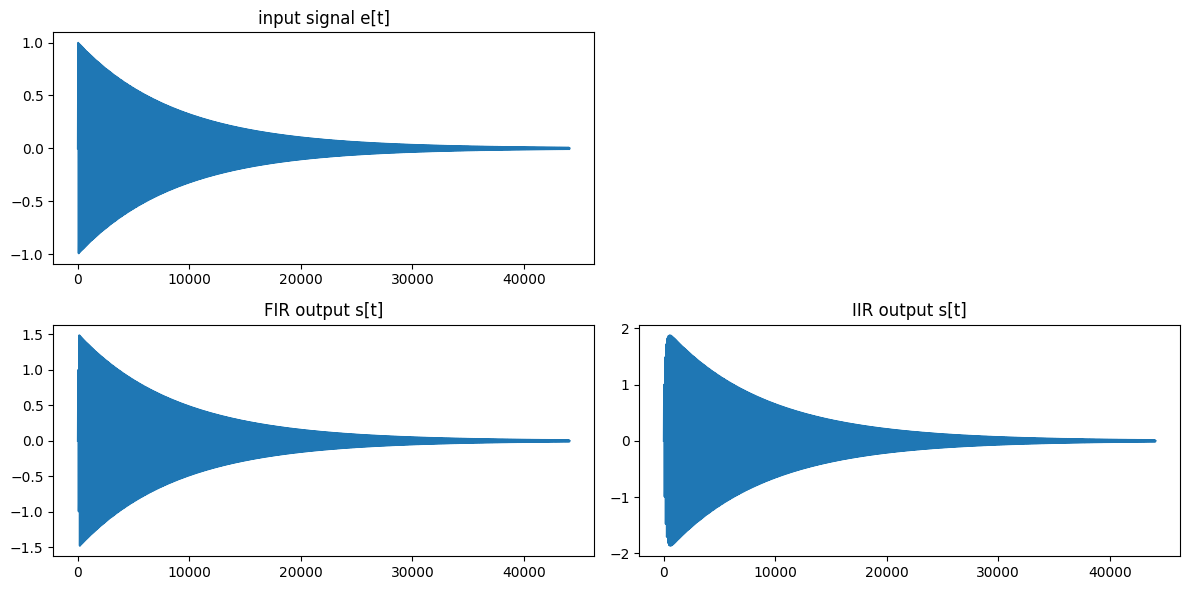

In [1]:
import numpy as np
import matplotlib.pyplot as plt

attenuation = 0.5 # attenuation factor
D = 100 # delay in samples
fs = 44100 # sampling rate (Hz)
alpha = 1.0 # scaling for IIR input (set to 1 for fair comparison with FIR)

# generate a short synthetic input signal
t = np.arange(0, 1, 1/fs)  # 1 second duration
e = np.sin(2 * np.pi * 440 * t) * np.exp(-5 * t)  # 440 Hz sine with decay
e = e.astype(np.float32)
N = len(e)

# FIR delay effect
s_fir = np.zeros(N, dtype=np.float32)
for t in range(N):
    s_fir[t] = e[t]
    if t >= D:
        s_fir[t] += attenuation * e[t - D]

# IIR delay effect
s_iir = np.zeros(N, dtype=np.float32)
for t in range(N):
    s_iir[t] = alpha * e[t]
    if t >= D:
        s_iir[t] += attenuation * s_iir[t - D] # same attenuation as beta

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(e)
plt.title('input signal e[t]')
plt.subplot(2, 2, 3)
plt.plot(s_fir)
plt.title('FIR output s[t]')
plt.subplot(2, 2, 4)
plt.plot(s_iir)
plt.title('IIR output s[t]')
plt.tight_layout()
plt.show()

FIR impulse response h_fir[t]:
h_fir[0] = 1.0000
h_fir[100] = 0.5000

IIR impulse response h_iir[t]:
h_iir[0] = 1.0000
h_iir[100] = 0.5000
h_iir[200] = 0.2500
h_iir[300] = 0.1250
h_iir[400] = 0.0625
h_iir[500] = 0.0312
h_iir[600] = 0.0156
h_iir[700] = 0.0078
h_iir[800] = 0.0039
h_iir[900] = 0.0020


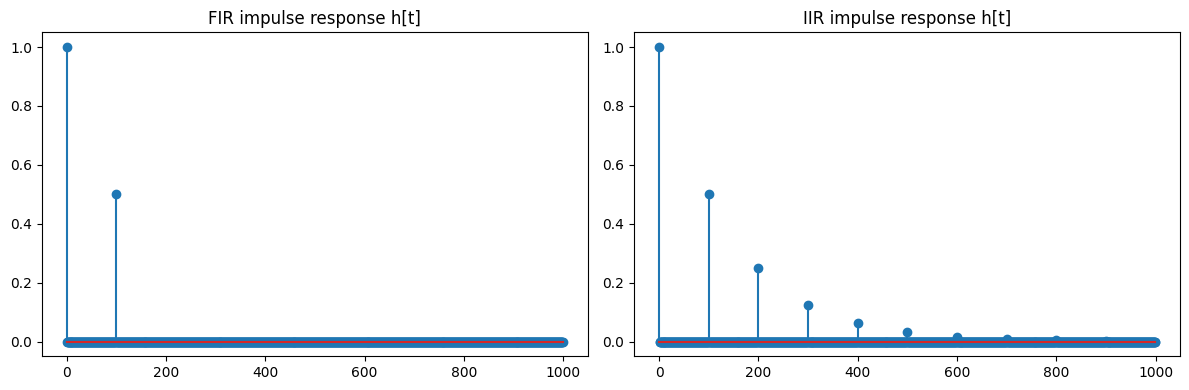

In [3]:
imp_len = 10 * D
impulse = np.zeros(imp_len)
impulse[0] = 1.0

# FIR impulse response
h_fir = np.zeros(imp_len, dtype=np.float32)
for t in range(imp_len):
    h_fir[t] = impulse[t]
    if t >= D:
        h_fir[t] += attenuation * impulse[t - D]

# IIR impulse response
h_iir = np.zeros(imp_len, dtype=np.float32)
for t in range(imp_len):
    h_iir[t] = alpha * impulse[t]
    if t >= D:
        h_iir[t] += attenuation * h_iir[t - D]

print("FIR impulse response h_fir[t]:")
print(f"h_fir[0] = {h_fir[0]:.4f}")
print(f"h_fir[{D}] = {h_fir[D]:.4f}")

print("\nIIR impulse response h_iir[t]:")
for k in range(imp_len // D + 1):
    idx = k * D
    if idx < imp_len:
        print(f"h_iir[{idx}] = {h_iir[idx]:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.stem(h_fir)
plt.title('FIR impulse response h[t]')
plt.subplot(1, 2, 2)
plt.stem(h_iir)
plt.title('IIR impulse response h[t]')
plt.tight_layout()
plt.show()


FIR |H(f)|:
at 0 Hz: 1.5000
at 2196 Hz: 1.4975
at 4393 Hz: 1.4900
at 6589 Hz: 1.4775
at 8786 Hz: 1.4601
at 10982 Hz: 1.4379

IIR |H(f)|:
at 0 Hz: 1.9980
at 2196 Hz: 1.9699
at 4393 Hz: 1.8914
at 6589 Hz: 1.7776
at 8786 Hz: 1.6480
at 10982 Hz: 1.5193


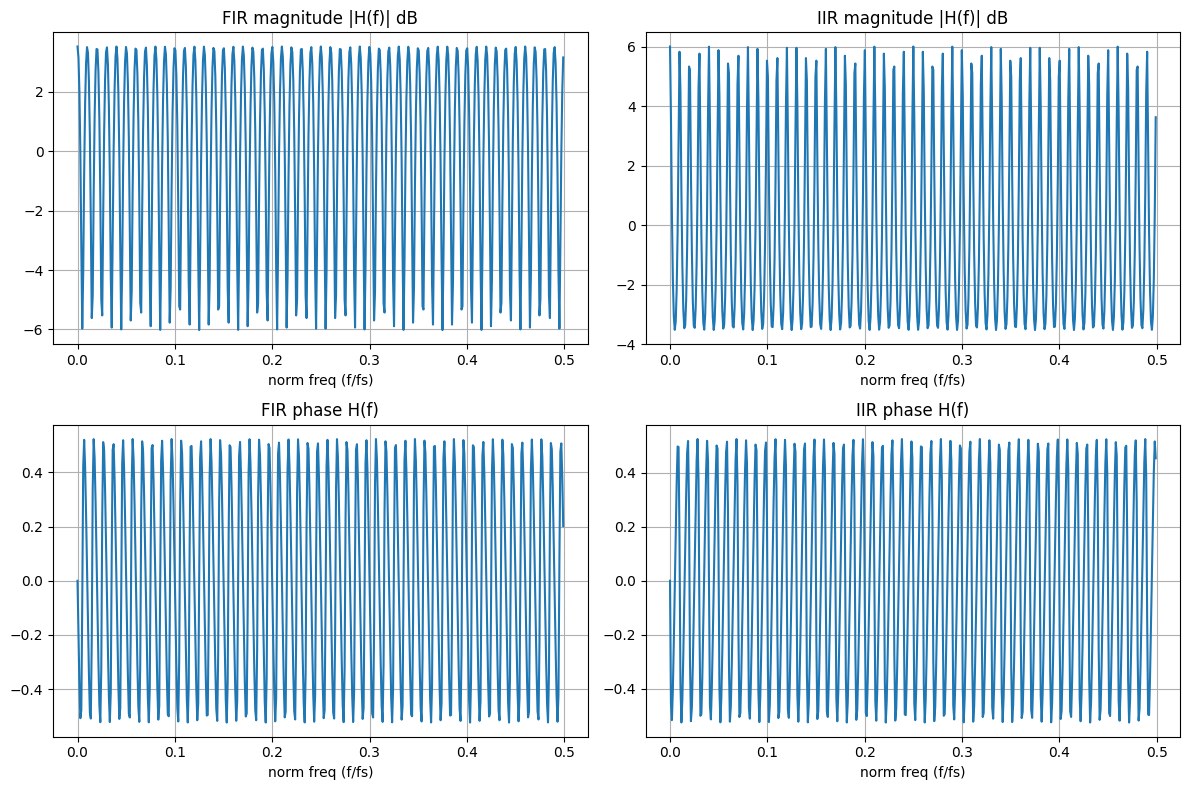

In [4]:
# frequency responses
fft_len = 2 ** int(np.ceil(np.log2(imp_len)))
freq = np.fft.fftfreq(fft_len, 1/fs)[:fft_len//2] # positive frequencies

# FIR
H_fir = np.fft.fft(h_fir, fft_len)
mag_fir = np.abs(H_fir[:fft_len//2])
phase_fir = np.angle(H_fir[:fft_len//2])

# IIR
H_iir = np.fft.fft(h_iir, fft_len)
mag_iir = np.abs(H_iir[:fft_len//2])
phase_iir = np.angle(H_iir[:fft_len//2])

print("\nFIR |H(f)|:")
print(f"at 0 Hz: {mag_fir[0]:.4f}")
for i in range(1, 6):
    idx = i * (len(freq) // 10)
    print(f"at {freq[idx]:.0f} Hz: {mag_fir[idx]:.4f}")

print("\nIIR |H(f)|:")
print(f"at 0 Hz: {mag_iir[0]:.4f}")
for i in range(1, 6):
    idx = i * (len(freq) // 10)
    print(f"at {freq[idx]:.0f} Hz: {mag_iir[idx]:.4f}")

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(freq / fs, 20 * np.log10(mag_fir + 1e-10))
plt.title('FIR magnitude |H(f)| dB')
plt.xlabel('norm freq (f/fs)')
plt.grid()
plt.subplot(2, 2, 2)
plt.plot(freq / fs, 20 * np.log10(mag_iir + 1e-10))
plt.title('IIR magnitude |H(f)| dB')
plt.xlabel('norm freq (f/fs)')
plt.grid()
plt.subplot(2, 2, 3)
plt.plot(freq / fs, phase_fir)
plt.title('FIR phase H(f)')
plt.xlabel('norm freq (f/fs)')
plt.grid()
plt.subplot(2, 2, 4)
plt.plot(freq / fs, phase_iir)
plt.title('IIR phase H(f)')
plt.xlabel('norm freq (f/fs)')
plt.grid()
plt.tight_layout()
plt.show()